## Evaluating my genetic algorithm

### Overview
This notebook will be used to evaluate the results returned by the genetic algorithm. With the aim of exploring, and investigating, the range of results it may produce.]

### Data Visualisation
This will include visualisations of how the algorithm learns over time.

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import json
import genetic_algorithm as ga
import numpy as np

**Best Params - According to run of Optuna optimisation**
for ease of use purposes I will be rounding these figures.

In [2]:
with open('best_params.json', 'r') as file:
    file = json.load(file)

In [3]:
rounded_params = {}

for param, value in file.items():
    if type(value) is str:
        rounded_params[param] = value
    elif type(value) is float:
        # Round floats to 3 decimal places
        rounded_params[param] = round(value, 3)
    else:
        # Round int to closest 100
        rounded_params[param] = round(value, -2)

In [4]:
rounded_params

{'selection_method': 'rank',
 'population_size': 200,
 'num_generations': 1000,
 'crossover_rate': 0.834,
 'mutation_rate': 0.219}

In [5]:
solution, score, population, generation_scores = ga.genetic_algorithm(**rounded_params)

print(f'Solution: {solution}')
print(f'Best Score: {score}')



Best Score: 355
Solution: [1, 13, 7, 2, 6, 10, 3, 9, 12, 11]
Best Score: 355


### EXAMPLE AND FINAL ANSWER

###### TASK 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
###### EMP  1,  13, 6,  2,  3,  10, 5,  7,  12, 11
###### SCR  55, 35, 37, 34, 35, 29, 27, 33, 33, 33
##### Total Score = 351

###### TASK 1,  2,  3,  4,  5,  6,  7,  8,  9,  10
###### EMP  **1,  13, 7,  2,  6,  10, 3,  9,  12, 11**
###### SCR  55, 35, 37, 34, 37, 29, 30, 32, 33, 33
##### Total Score = 355


## Average Performance
We can run the algorithm 10 times to find the average, min, and max performance. We can also have a look at the algorithm process for each of these runs to understand how it learns.

In [ ]:
# Get average scores and a dioctionary of the algorithm progress each run makes.
solutions = []
scores = []
algorithm_progress = {}

for i in range(10):
    solution, score, population, generation_scores= ga.genetic_algorithm(**rounded_params)
    solutions.append(solution)
    scores.append(score)
    algorithm_progress[i] = generation_scores

print(f"Mean score: {np.mean(scores)}, Max Score: {max(scores)}, Min Score: {min(scores)}")

Best Score: 355
Best Score: 355
Best Score: 355
Best Score: 355
Best Score: 355
Best Score: 355
Best Score: 355
Best Score: 351
Best Score: 355
Best Score: 355
Mean score: 354.6, Max Score: 355, Min Score: 351


### Plot the progress of each of these runs

In [ ]:
df_dict ={}
for run, generation_scores in algorithm_progress.items():
    data = []
    for gen_num, score in enumerate(generation_scores):
        data.append({
            'run': run,
            'generation': gen_num,
            'score': score,
        })
    
    df = pd.DataFrame(data)
    df_dict[run] = df

{0:      run  generation  score
 0      0           0    298
 1      0           1    315
 2      0           2    333
 3      0           3    333
 4      0           4    333
 ..   ...         ...    ...
 995    0         995    355
 996    0         996    355
 997    0         997    355
 998    0         998    355
 999    0         999    355
 
 [1000 rows x 3 columns],
 1:      run  generation  score
 0      1           0    304
 1      1           1    310
 2      1           2    316
 3      1           3    324
 4      1           4    324
 ..   ...         ...    ...
 995    1         995    355
 996    1         996    355
 997    1         997    355
 998    1         998    355
 999    1         999    355
 
 [1000 rows x 3 columns],
 2:      run  generation  score
 0      2           0    310
 1      2           1    312
 2      2           2    314
 3      2           3    318
 4      2           4    328
 ..   ...         ...    ...
 995    2         995    355
 996   

/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/opt/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


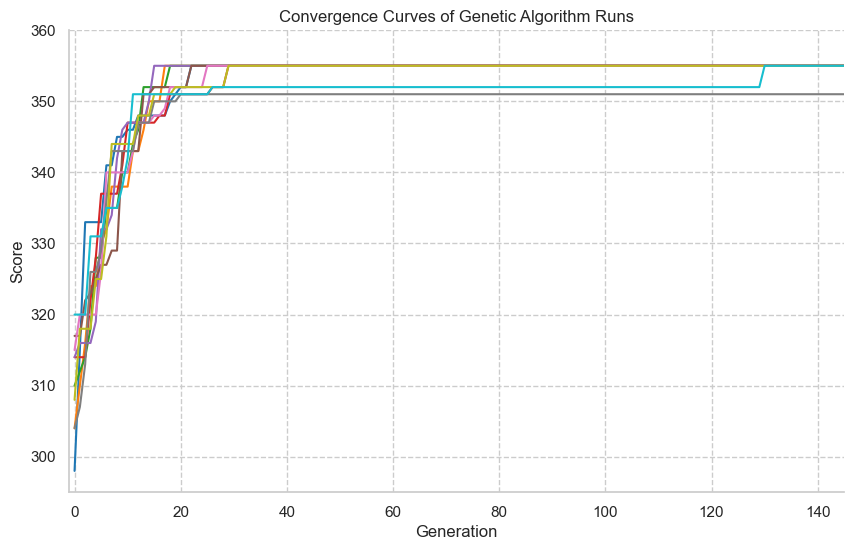

In [ ]:
df_combined = pd.concat(df_dict.values(), ignore_index=True)

plt.figure(figsize=(10,6))

sns.set_theme(style='whitegrid',rc={
    "grid.linestyle": "--"
})
sns.lineplot(data=df_combined, x='generation', y='score', hue='run', palette='tab10', linewidth=1.5, legend=False)
sns.despine()


plt.xlim(-1, 145)
plt.ylim(295, 360)
plt.xlabel("Generation")
plt.ylabel('Score')
plt.title('Convergence Curves of Genetic Algorithm Runs')

plt.show()

# Comparison between brute-force and genetic algorithms

## Results
We can view the difference in results and scores from each run, the brute-force algorithm is expected to obtain 355 everytime.

## Runtime
Recording the runtime will be valuable information for comparing and highlighting why genetic algorithms exist.


**As the brute-force algorithm will take a long time, i've decided to do 3 runs of each**
This should be enough to showcase the increased resources needed for brute-force algorithms.

In [10]:
# Comparison to the brute force
from brute_force import brute_force_algorithm
from performance_matrix import PERFORMANCE_MATRIX
import time

brute_force_scores = []
brute_force_times = []
for i in range(3):
    print(f"Starting Brute-force {i+1}")
    start = time.time()
    _, score = brute_force_algorithm(performance_matrix=PERFORMANCE_MATRIX)
    end = time.time()

    runtime = end-start
    brute_force_times.append(runtime)
    brute_force_scores.append(score)

ga_scores = []
ga_times = []
for i in range(3):
    print(f"Starting GA {i+1}")
    start = time.time()
    _, score, _, _= ga.genetic_algorithm(**rounded_params)
    end = time.time()

    runtime = end-start
    ga_times.append(runtime)
    ga_scores.append(score)

Starting Brute-force 1
Found 1 solutions reaching 355
Solution: (1, 13, 7, 2, 6, 10, 3, 9, 12, 11)
Starting Brute-force 2
Found 1 solutions reaching 355
Solution: (1, 13, 7, 2, 6, 10, 3, 9, 12, 11)
Starting Brute-force 3
Found 1 solutions reaching 355
Solution: (1, 13, 7, 2, 6, 10, 3, 9, 12, 11)
Starting GA 1
Best Score: 355
Starting GA 2
Best Score: 355
Starting GA 3
Best Score: 351


In [1]:
# Apply the Seaborn theme
sns.set_theme(style='whitegrid', rc={"grid.linestyle": "--"})

# Prepare the data for Seaborn
data = {
    'Algorithm': ['Brute Force', 'Brute Force', 'Genetic Algorithm', 'Genetic Algorithm'],
    'Metric': ['Average Score', 'Average Runtime (s)', 'Average Score', 'Average Runtime (s)'],
    'Value': [
        sum(brute_force_scores) / len(brute_force_scores),  # Average score
        sum(brute_force_times) / len(brute_force_times),    # Average runtime
        sum(ga_scores) / len(ga_scores),                   # Average score
        sum(ga_times) / len(ga_times)                      # Average runtime
    ]
}
df_combined = pd.DataFrame(data)

# Create the grouped bar chart
plt.figure(figsize=(5, 6))
sns.barplot(
    data=df_combined, 
    x='Algorithm', 
    y='Value', 
    hue='Metric', 
    palette='tab10', 
    dodge=True
)
sns.despine()

# Customize the chart
plt.title('Comparison of Brute Force and Genetic Algorithm', fontsize=14)
plt.ylabel('Value')
plt.xlabel('')
plt.legend(title='Metric', loc='upper right', fontsize=10)
plt.tight_layout()
plt.show()


NameError: name 'sns' is not defined